In [1]:
using Distributions
using AlphaStableDistributions
using Statistics
using Plots
using StatsPlots
using StatsFuns
using Measures

import ColorSchemes.viridis

In [2]:
parent_folder = dirname(dirname(pwd()))
source_path = parent_folder * "\\src\\julia"

include("$source_path/01_priors.jl")
include("$source_path/02_diffusion.jl")
include("$source_path/03_experiment.jl")
include("$source_path/04_datasets.jl")

generate_levy_batch

Parameters

•	a = threshold separation; 

•	zr = relative starting point;

•	v0 = drift rate for blue stimuli or non-word stimuli;

•	v1 = drift rate for orange stimuli or word stimuli; 

•	t0 = non-decisional time; 

•	alpha = stability parameter of noise distribution; 

•	sz = across-trial variability in starting point; 

•	sv = across-trial variability in drift rate;

•	st = across-trial variability in non-decisional processes 



Other Stuff

•	dt = granularity of time steps

•	tol = maximum number of time steps

•	rho = scaling factor

•	beta = skewness of the levy distribution (always 0 in our use case?)

# Prior predictive checks

## Possible conceptions of alpha

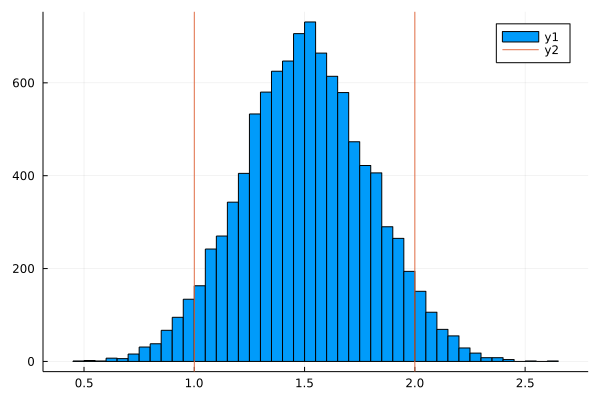

In [3]:
# TEMPORARY: Simulate alpha estimates from Voss et al. (2019)
# basic diffusion model
histogram(rand(Normal(1.51, 0.29), 10000))
vline!([1, 2])

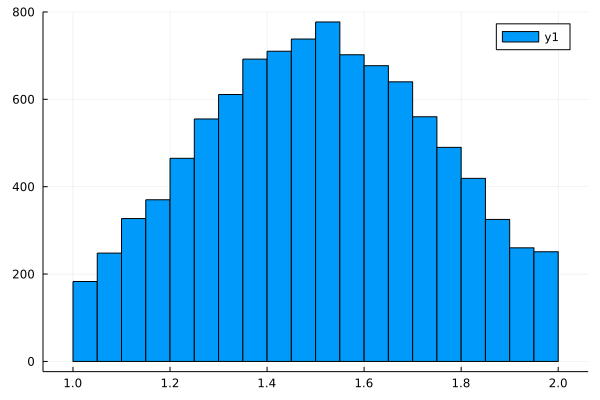

In [4]:
histogram(rand(TruncatedNormal(1.51, 0.29, 1, 2), 10000))

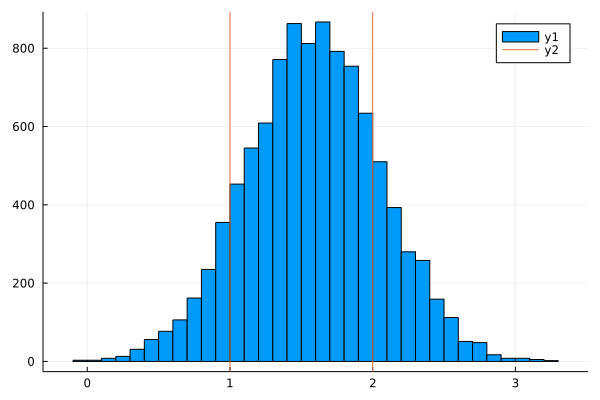

In [5]:
# TEMPORARY: Simulate alpha estimates from Voss et al. (2019)
# full diffusion model

histogram(rand(Normal(1.58, 0.46), 10000))
vline!([1, 2])

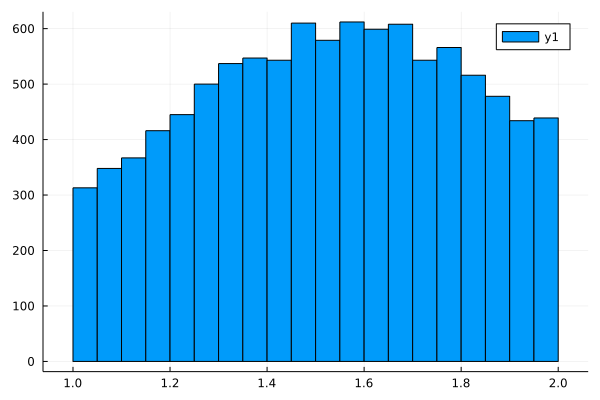

In [6]:
histogram(rand(TruncatedNormal(1.58, 0.46, 1, 2), 10000))

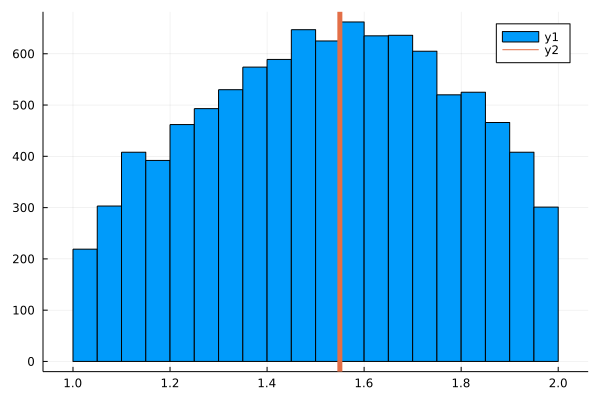

In [7]:
# only single speed 
histogram(rand(TruncatedNormal(1.55, 0.38, 1, 2), 10000))
vline!([1.55], linewidth=5)

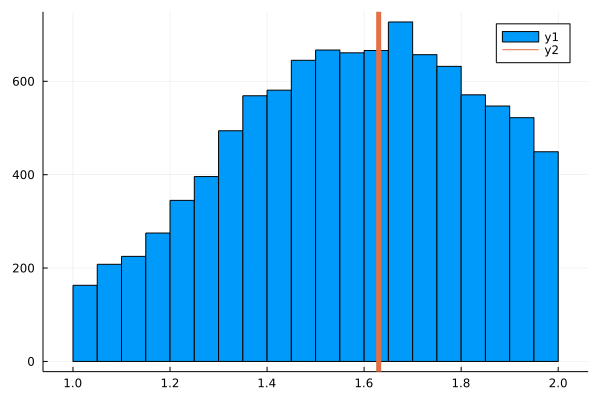

In [8]:
# all speed tasks 
histogram(rand(TruncatedNormal(1.63, 0.36, 1, 2), 10000))
vline!([1.63], linewidth=5)

## Prior predictive checks 

In [97]:
function alt_alpha_hyperprior()
    mu_alpha_alt = rand(Normal(1.7, 0.1))
    sigma_alpha_alt = rand(TruncatedNormal(0.3, 0.15, 0, Inf))
    
    return [mu_alpha_alt, sigma_alpha_alt]
end

function alt_alpha_prior(mu_alpha_alt, sigma_alpha_alt)
    alpha_l = rand(TruncatedNormal(mu_alpha_alt, sigma_alpha_alt, 1, 2))
    
    return alpha_l
end

alt_alpha_prior (generic function with 1 method)

0.23228543119466422

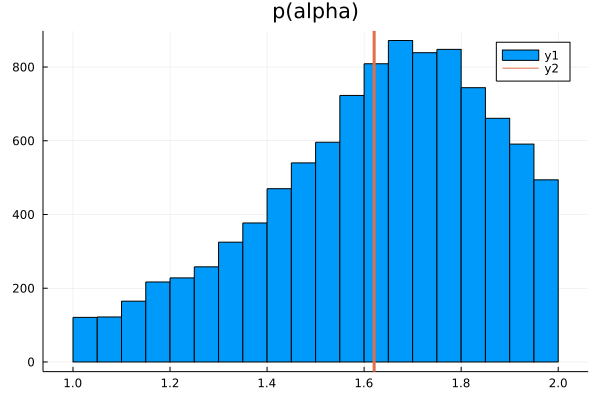

In [98]:
# p(alpha) - only one 1 person per data set - marginalize out hyperpriors

n_sims_datasets = 10000
n_sims_persons = 1

sim_data = fill(0.0, (n_sims_datasets, n_sims_persons))

for d in 1:n_sims_datasets
    hyperpriors = alt_alpha_hyperprior()
    for i in 1:n_sims_persons
        sim_data[d, i] = alt_alpha_prior(hyperpriors...)
    end
end

print(std(sim_data))
histogram(sim_data, title="p(alpha)")
vline!([mean(sim_data)], linewidth=3)

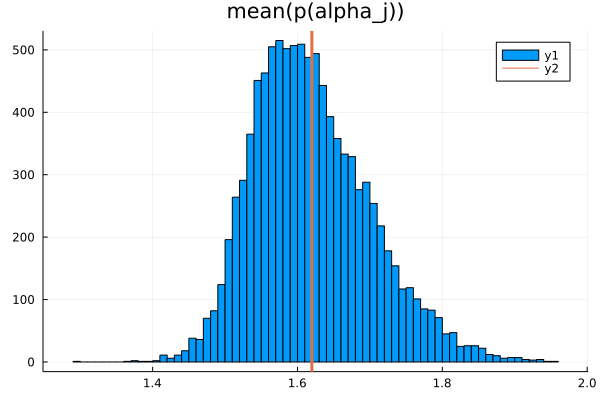

In [99]:
# mean(p(theta_j)) - sum up parameters for 100 persons

n_sims_datasets = 10000
n_sims_persons = 100

sim_data = fill(0.0, (n_sims_datasets, n_sims_persons))

for d in 1:n_sims_datasets
    hyperpriors = alt_alpha_hyperprior()
    for i in 1:n_sims_persons
        sim_data[d, i] = alt_alpha_prior(hyperpriors...)
    end
end

sim_data_means_per_dataset = mean(sim_data, dims=2)[:,1];
histogram(sim_data_means_per_dataset, title="mean(p(alpha_j))")
vline!([mean(sim_data_means_per_dataset)], linewidth=3)